In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Only one time run if you do not have fastai in the current working directory or have not symlinked yet.
!ln -s ../fastai/fastai/ fastai

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
from sklearn.metrics import f1_score

def f1(preds, targs):
    return f1_score(targs, np.argmax(preds, axis=1), average='micro')
    
metrics = [f1]

In [5]:
PATH= "data/"
sz = 300
bs = 64

In [6]:
model = resnet50

In [7]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [12]:
# def get_data(sz):
#     tfms = tfms_from_model(model, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
#     return ImageClassifierData.from_csv(PATH, 'train_all', label_csv, tfms=tfms,
#                     suffix='', val_idxs=val_idxs, test_name='test')

def get_data(sz):
    tfms = tfms_from_model(model, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, 'train_all', label_csv, tfms=tfms,
                    suffix='', val_idxs=[0], test_name='test')

In [13]:
data = get_data(sz)

In [14]:
torch.manual_seed(43)
learn = ConvLearner.pretrained(model, data, precompute=True, metrics=metrics)

100%|██████████| 1/1 [00:00<00:00, 32.70it/s]


In [11]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 90%|█████████ | 54/60 [00:01<00:00, 53.61it/s, loss=11.8]


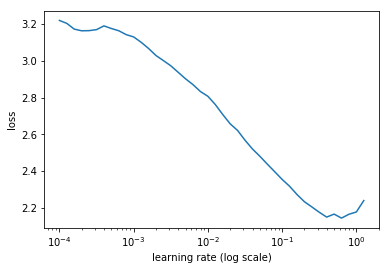

In [12]:
learn.sched.plot()

In [15]:
learn.precompute = False

In [16]:
lr = 0.1

In [17]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       1.17755  0.05421  1.     ]                     
[ 1.       0.92398  0.02278  1.     ]                      
[ 2.       0.66375  0.03179  1.     ]                      
[ 3.       0.65556  0.05942  1.     ]                      
[ 4.       0.52346  0.01755  1.     ]                      
[ 5.       0.43492  0.01414  1.     ]                      
[ 6.       0.38035  0.02069  1.     ]                      



In [18]:
lrs = np.array([lr/100,lr/10,lr])

In [19]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.43139  0.04963  1.     ]                      
[ 1.       0.29354  0.01177  1.     ]                      
[ 2.       0.19706  0.00674  1.     ]                      
[ 3.       0.17297  0.01151  1.     ]                      
[ 4.       0.13204  0.16145  1.     ]                      
[ 5.       0.10906  0.06653  1.     ]                      
[ 6.       0.06979  0.04732  1.     ]                       



In [20]:
learn.save("resnet50_ziron_fulltrain")

In [21]:
log_preds = learn.predict(is_test=True)

In [26]:
preds = np.argmax(np.exp(log_preds), axis=1)
classes = [data.classes[i].replace("_", " ") for i in preds]

In [27]:
classes[:10]

['Fat Hen',
 'Fat Hen',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Small-flowered Cranesbill',
 'Sugar beet',
 'Scentless Mayweed',
 'Cleavers',
 'Charlock',
 'Common Chickweed']

In [30]:
submit = pd.DataFrame({'file': os.listdir(f'{PATH}test'), 'species': classes})
submit.to_csv('submit.csv', index=False)

In [31]:
submit.head()

,file,species
0,12625488b.png,Fat Hen
1,c832e4302.png,Fat Hen
2,e82017baa.png,Loose Silky-bent
3,c10ccbd82.png,Scentless Mayweed
4,8b27bfd2b.png,Small-flowered Cranesbill


In [32]:
FileLink('submit.csv')

/home/ubuntu/plant_seedlings_src/submit.csv